# Finance Data Project 

In this data project I will focus on exploratory data analysis of stock prices.
I'll focus on bank stocks and see how they progressed throughout the financial crisis all the way to early 2016.

Get the Data


In [22]:
from pandas_datareader import data, wb
import pandas as pd
import numpy as np
import datetime
%matplotlib inline

Data

Let's get stocks from the following banks using datareader.
*  Bank of America
* CitiGroup
* Goldman Sachs
* JPMorgan Chase
* Morgan Stanley
* Wells Fargo

In [23]:
from pandas_datareader import data, wb
import yfinance as yf
from datetime import datetime
yf.pdr_override()
 
start= datetime(2006,1,1)
end = datetime(2016,1,1)
 
# Bank of America
BAC = data.get_data_yahoo('BAC', start, end)

[*********************100%%**********************]  1 of 1 completed

1 Failed download:
['BAC']: ConnectionError(MaxRetryError("HTTPSConnectionPool(host='query1.finance.yahoo.com', port=443): Max retries exceeded with url: /v1/test/getcrumb (Caused by NewConnectionError('<urllib3.connection.HTTPSConnection object at 0x0000025177DA0550>: Failed to establish a new connection: [Errno 11001] getaddrinfo failed'))"))


In [24]:
# CitiGroup 
C = data.get_data_yahoo('C',start,end)

# Goldman Sachs 
GS = data.get_data_yahoo('GS',start,end)

# JPMorgan Chase 
JPM = data.get_data_yahoo('JPM',start,end)

# Morgan Stanley 
MS = data.get_data_yahoo('MS',start,end)

# Wells Fargo 
WF = data.get_data_yahoo('WF',start,end)

[*********************100%%**********************]  1 of 1 completed

1 Failed download:
['C']: %ticker%onnectionError(MaxRetryError("HTTPS%ticker%onnectionPool(host='query1.finance.yahoo.com', port=443): Max retries exceeded with url: /v1/test/getcrumb (%ticker%aused by New%ticker%onnectionError('<urllib3.connection.HTTPS%ticker%onnection object at 0x0000025177E63850>: Failed to establish a new connection: [Errno 11001] getaddrinfo failed'))"))


KeyboardInterrupt: 

In [4]:
JPM.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,


Let's take a look at the columns 
* Open - the price at which a stock started trading in the morning (numeric,float)
* High - the highest price for a stock during the day (numeric,float)
* Low - the lowest price for a stock during the day (numeric,float)
* Close - the price at which a stock finished trading in the afternoon or whenever does the market close (numeric,float) 
* Adj Close - the closing price after dividend payouts, stock splits, or the issue of additional shares have been taken into account (numeric,float)
* Volume - total number of shares traded during the day (numeric,int)

Create a list of the ticker symbols

In [5]:
tickers = ['BAC','C','GS','JPM','MS','WF']

Concatenate the bank dataframes together to a single data frame

In [6]:
bank_stocks = pd.concat([BAC,C,GS,JPM,MS,WF],axis=1,keys=tickers)
bank_stocks.head()

Empty DataFrame
Columns: [(BAC, Open), (BAC, High), (BAC, Low), (BAC, Close), (BAC, Adj Close), (BAC, Volume), (C, Open), (C, High), (C, Low), (C, Close), (C, Adj Close), (C, Volume), (GS, Open), (GS, High), (GS, Low), (GS, Close), (GS, Adj Close), (GS, Volume), (JPM, Open), (JPM, High), (JPM, Low), (JPM, Close), (JPM, Adj Close), (JPM, Volume), (MS, Open), (MS, High), (MS, Low), (MS, Close), (MS, Adj Close), (MS, Volume), (WF, Open), (WF, High), (WF, Low), (WF, Close), (WF, Adj Close), (WF, Volume)]
Index: []

[0 rows x 36 columns]

Set the column name levels

In [7]:
bank_stocks.columns.names = ['Bank Ticker','Stock Info']

Take a look at the df head

In [8]:
bank_stocks.head()

Empty DataFrame
Columns: [(BAC, Open), (BAC, High), (BAC, Low), (BAC, Close), (BAC, Adj Close), (BAC, Volume), (C, Open), (C, High), (C, Low), (C, Close), (C, Adj Close), (C, Volume), (GS, Open), (GS, High), (GS, Low), (GS, Close), (GS, Adj Close), (GS, Volume), (JPM, Open), (JPM, High), (JPM, Low), (JPM, Close), (JPM, Adj Close), (JPM, Volume), (MS, Open), (MS, High), (MS, Low), (MS, Close), (MS, Adj Close), (MS, Volume), (WF, Open), (WF, High), (WF, Low), (WF, Close), (WF, Adj Close), (WF, Volume)]
Index: []

[0 rows x 36 columns]

EDA

Let's explore the data a bit!

What is the max Close price for each bank's stock throughout the time period?

In [9]:
bank_stocks.xs('Close',axis=1,level='Stock Info').max()

Bank Ticker
BAC   NaN
C     NaN
GS    NaN
JPM   NaN
MS    NaN
WF    NaN
dtype: float64

** Create a new empty DataFrame called returns. This dataframe will contain the returns for each bank's stock. returns are typically defined by:**

$$r_t = \frac{p_t - p_{t-1}}{p_{t-1}} = \frac{p_t}{p_{t-1}} - 1$$

In [10]:
returns = pd.DataFrame()

Use pandas pct_change() method on the Close column to create a column representing this return value.

In [21]:
for var in tickers:
    returns[var+' Return'] = bank_stocks.xs((var,'Close'),axis=1).pct_change()
    #returns[var+' Return'] = bank_stocks[var]['Close'].pct_change()
returns.head()

ValueError: attempt to get argmax of an empty sequence

Create a pairplot using seaborn of the returns dataframe.

c:\Users\olekh\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\olekh\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\olekh\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\olekh\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating

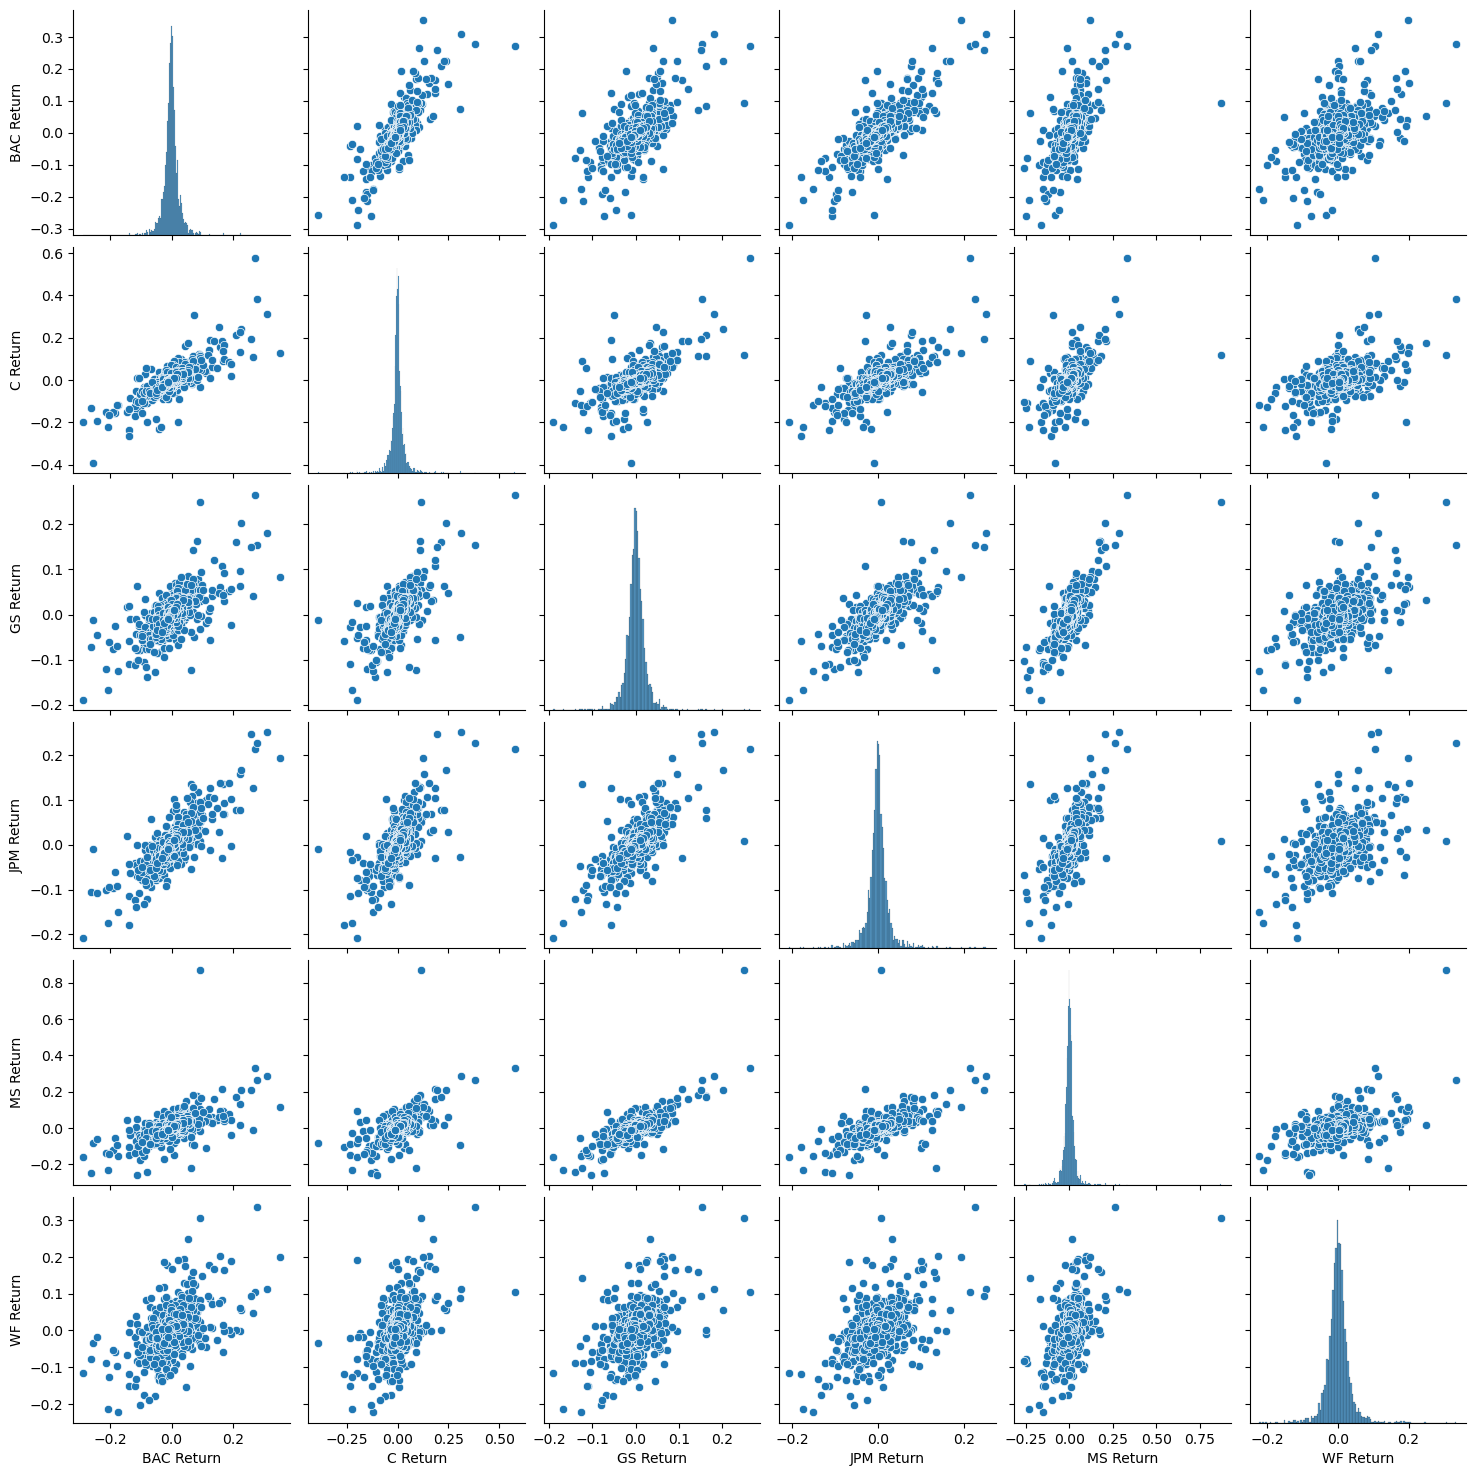

In [ ]:
import seaborn as sns
sns.pairplot(data=returns[1:])

In [ ]:
returns.head()

,BAC Return,C Return,GS Return,JPM Return,MS Return,WF Return
Date,,,,,,
2006-01-03,NaN,NaN,NaN,NaN,NaN,NaN
2006-01-04,-0.010620,-0.018462,-0.013812,-0.014183,0.000686,0.015536
2006-01-05,0.001288,0.004961,-0.000393,0.003029,0.002742,-0.018196
2006-01-06,-0.001501,0.000000,0.014169,0.007046,0.001025,0.042316
2006-01-09,0.000644,-0.004731,0.012030,0.016242,0.010586,-0.020456


Figure out on what dates each bank stock had the best and worst single day returns

In [ ]:
returns.idxmin() # returns an index (date) of a minimum value in every column

BAC Return   2009-01-20
C Return     2009-02-27
GS Return    2009-01-20
JPM Return   2009-01-20
MS Return    2008-10-09
WF Return    2008-09-29
dtype: datetime64[ns]

In [12]:
returns.idxmax()

Series([], dtype: int64)

you can see that the worst and the best days of CitiGroup were very close to each other

Take a look at the standard deviation of the returns

In [13]:
returns.std()

Series([], dtype: float64)

In [14]:
returns.loc['2015-01-01':'2015-12-31'].std()

Series([], dtype: float64)

** Create a distplot using seaborn of the 2015 returns for Morgan Stanley **

c:\Users\olekh\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\olekh\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


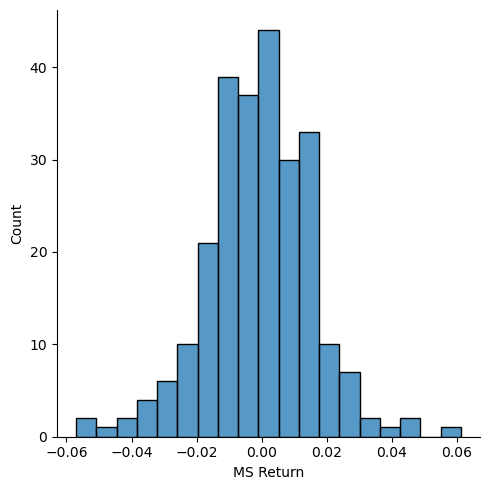

In [15]:
sns.displot(returns.loc['2015-01-01':'2015-12-31']['MS Return'])

** Create a distplot using seaborn of the 2008 returns for CitiGroup **

c:\Users\olekh\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\olekh\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


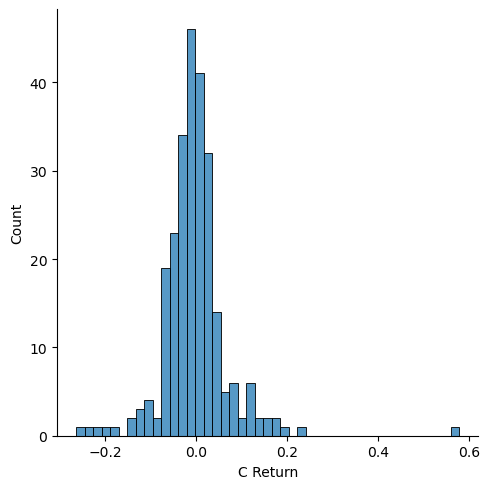

In [16]:
sns.displot(returns.loc['2008-01-01':'2008-12-31']['C Return'])

More Visualization

Let's import necessary libraries

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline

# Optional Plotly Method Imports
import plotly
import cufflinks as cf
cf.go_offline()

** Create a line plot showing Close price for each bank for the entire index of time.

<Axes: xlabel='Date'>

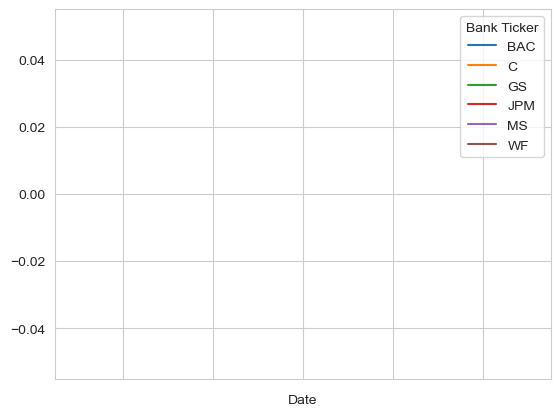

In [17]:
bank_stocks.xs('Close',axis=1,level='Stock Info').plot.line()

In [121]:
bank_stocks.xs('Close',axis=1,level='Stock Info').iplot()

Moving Averages

Let's analyze the moving averages for these stocks in the year 2008. 

Plot the rolling 30 day average against the Close Price for Bank Of America's stock for the year 2008

<Axes: xlabel='Date'>

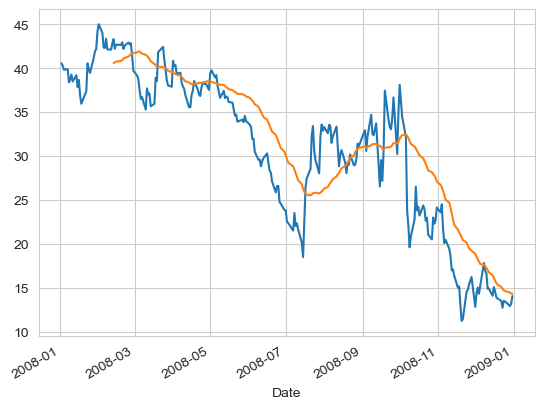

In [132]:
bank_stocks['BAC','Close'].loc['2008-01-01':'2008-12-31'].plot()
bank_stocks['BAC','Close'].loc['2008-01-01':'2008-12-31'].rolling(30).mean().plot()

Create a heatmap of the correlation between the stocks Close Price

<Axes: xlabel='Bank Ticker', ylabel='Bank Ticker'>

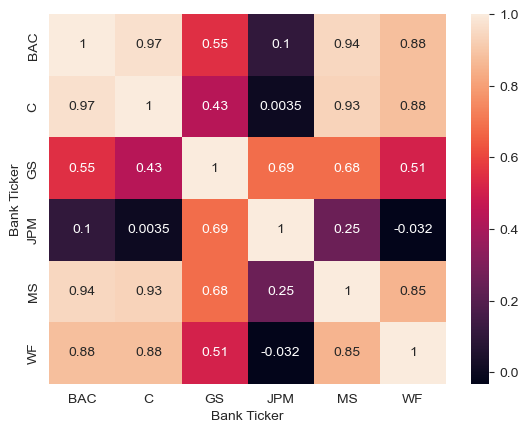

In [133]:
xc = bank_stocks.xs('Close',axis=1,level='Stock Info').corr(numeric_only=True)
sns.heatmap(xc,annot=True)

you can see that these banks' closing prices are highly correlated to each other 

Cluster the correlations together

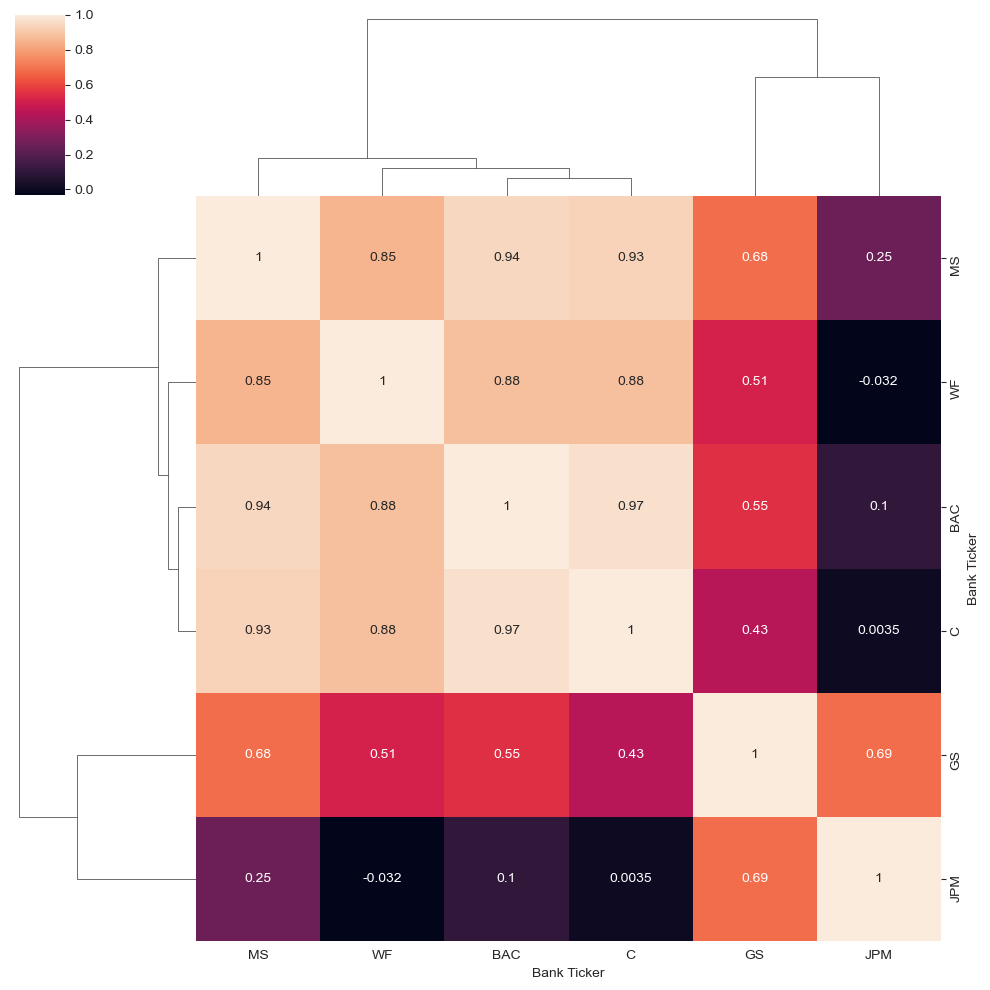

In [136]:
sns.clustermap(xc,annot=True)


Now let's rely on the cufflinks library to create some technical analysis plots

Create a candle plot of Bank of America's stock from Jan 1st 2015 to Jan 1st 2016 using .iplot()

In [141]:
data = BAC[['Open','High','Low','Close']].loc['2015-01-01':'2016-01-01']
data.iplot(kind='candle')

Create a Simple Moving Averages plot of Morgan Stanley for the year 2015 using .ta_plot()

In [142]:
MS['Close'].loc['2015-01-01':'2015-12-31'].ta_plot(study='sma')

Create a Bollinger Band Plot for Bank of America for the year 2015 using .ta_plot()

In [143]:
BAC['Close'].loc['2015-01-01':'2015-12-31'].ta_plot(study='boll')

# Great Job!

Definitely a lot of more specific finance topics here, so don't worry if you didn't understand them all! The only thing you should be concerned with understanding are the basic pandas and visualization oeprations.